<a href="https://colab.research.google.com/github/UWIZEYEDelphine/enhanced-densenet/blob/main/Capstone_design_on_food_11_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.applications.resnet_v2 import ResNet152V2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
resnet=ResNet152V2(weights='imagenet',include_top=False,input_shape=(300,300,3))
for layer in resnet.layers[:]:
  layer.trainable=False

model=Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [ ]:
dir1='/content/delphine/food-11/training'
dir2='/content/delphine/food-11/validation'

gen1=ImageDataGenerator(rescale= 1./255,height_shift_range=0.2,rotation_range=30)
gen2=ImageDataGenerator(rescale=1./255)

training_data=gen1.flow_from_directory(dir1, batch_size=32, target_size=(300,300))
validation_data=gen2.flow_from_directory(dir2, batch_size=32, target_size=(300,300))
print(training_data.image_shape)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
(300, 300, 3)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')
history=model.fit(training_data, epochs=40, verbose=1, validation_data=validation_data,steps_per_epoch=320, validation_steps=120)

Epoch 1/40
320/320 [==============================] - 432s 1s/step - loss: 2.2148 - accuracy: 0.6483 - val_loss: 1.0647 - val_accuracy: 0.7680
Epoch 2/40
320/320 [==============================] - 329s 1s/step - loss: 1.0120 - accuracy: 0.7658 - val_loss: 0.9903 - val_accuracy: 0.7955
Epoch 3/40
320/320 [==============================] - 330s 1s/step - loss: 0.8725 - accuracy: 0.8015 - val_loss: 1.1153 - val_accuracy: 0.7989
Epoch 4/40
320/320 [==============================] - 329s 1s/step - loss: 0.7590 - accuracy: 0.8239 - val_loss: 1.0120 - val_accuracy: 0.8146
Epoch 5/40
320/320 [==============================] - 330s 1s/step - loss: 0.7016 - accuracy: 0.8414 - val_loss: 1.0570 - val_accuracy: 0.8173
Epoch 6/40
320/320 [==============================] - 328s 1s/step - loss: 0.6483 - accuracy: 0.8590 - val_loss: 1.0614 - val_accuracy: 0.8275
Epoch 7/40
320/320 [==============================] - 329s 1s/step - loss: 0.5872 - accuracy: 0.8729 - val_loss: 1.0036 - val_accuracy: 0.8264

In [ ]:
from keras.models import save_model
save_model(model,'/content/delphine/models/capstone-model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/delphine/models/capstone-model/assets


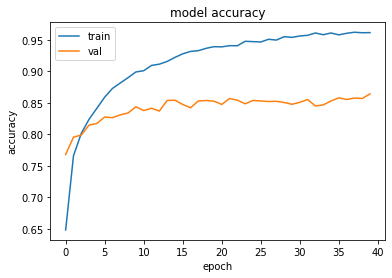

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!unzip -uq '/content/delphine/food-11.zip'  -d '/content/delphine/food-11/capstone-test'

In [ ]:
from keras.models import load_model
model= load_model('/content/delphine/models/capstone-model')

In [ ]:
from keras.preprocessing.image import load_img
image= load_img('/content/delphine/food-11/testing-pcs/spgti.jpg', target_size=(300,300))
image=np.reshape(image,[1,300,300,3])
image=image/255
pred=np.argmax(model.predict(image))
print(training_data.class_indices)
print(pred)

{'bread': 0, 'dessert': 1, 'diary product': 2, 'egg': 3, 'fried food': 4, 'meat': 5, 'noodles, pasta': 6, 'rice': 7, 'seafood': 8, 'soup': 9, 'vegetable, fruit': 10}
6


In [ ]:
image= load_img('/content/delphine/food-11/testing-pcs/meat1.jpg', target_size=(300,300))
image=np.reshape(image,[1,300,300,3])
image=image/255
pred=np.argmax(model.predict(image))
print(pred)

5


In [ ]:
image= load_img('/content/delphine/food-11/testing-pcs/dessert1.jpg', target_size=(300,300))
image=np.reshape(image,[1,300,300,3])
image=image/255
pred=np.argmax(model.predict(image))
print(pred)

1


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/breads'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[4 0 0 0 3 1 1 1 5 4]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/desserts'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[1 9 2 1 2 1 2 1 1 1]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/diary-products'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[2 2 1 2 2 2 1 2 2 2]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/eggs'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[8 3 0 3 1 3 2 3 7 9]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/fried-foods'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[4 4 4 1 4 4 5 4 4 0]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/meats'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[2 3 1 5 5 5 5 5 5 4]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/noodles-pastas'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[9 3 6 6 1 6 9 6 6 6]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/rices'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 9 images belonging to 1 classes.
[7 7 7 7 7 7 7 7 1 7]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/seafoods'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[1 5 8 8 8 5 2 5 9 1]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/soups'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[9 9 9 9 9 9 6 9 9 1]


In [ ]:
dir3= '/content/delphine/food-11/capstone-test/vegetables-fruits'
test_data=validation_data=gen2.flow_from_directory(dir3, batch_size=1, target_size=(300,300),class_mode=None)
#test_data.reset()
results=model.predict_generator(test_data,10)
result=np.argmax(results,axis=1)
print(result)

Found 10 images belonging to 1 classes.
[10  1 10 10 10 10 10 10 10 10]


In [ ]:
history=model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()